<a href="https://colab.research.google.com/github/hajri94/research-project/blob/main/Outlier_detection%26repair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from numpy import percentile
import seaborn as sns

In [ ]:
# we upload the excel file.
from google.colab import files
uploaded = files.upload()

Saving 10259.xlsx to 10259 (1).xlsx


In [ ]:
# we read the file.
import io 
df = pd.read_excel(io.BytesIO(uploaded['10259.xlsx']))
# We delete duplicated rows and reset indices
df = df.drop_duplicates()
df=df.reset_index(drop=True)
# we keep only the the two column 'POWER1' and 'READ_DATE' 
df=df.drop(labels=['Unnamed: 0', 'METERID','ENERGY','VOLUME','HOURS','FLOW','FLOW_TEMP','RETURN_TEMP','HOT_WATER','SEC_FLOW','SEC_RETURN'], axis=1)
# we move the 'READ_DATE' to the first column 
first_column = df.pop('READ_DATE')
df.insert(0, 'READ_DATE', first_column)






In [ ]:
# we upload the excel file.
from google.colab import files
uploaded = files.upload()

Saving Clima_Hour_2019.xlsx to Clima_Hour_2019 (1).xlsx


In [ ]:
# we read the file.
import io 
df1 = pd.read_excel(io.BytesIO(uploaded['Clima_Hour_2019.xlsx']))
# we remove the 'Wind.direction	' ,'Wind.speed'column as we will not use them in our model.
df1=df1.drop(labels=['Wind.speed','Wind.direction'], axis=1)
# We join the "df1" Dataframe to the original dataframe "df".
df2 = pd.concat([df1,df], axis=1, join='inner')
# We move the "READ_DATE" column to first position.
second_column = df2.pop('READ_DATE')
df2.insert(0, 'READ_DATE', second_column)
# We round the columns (Temperature, Irradiation.flux) to two decimal place.
df2['Temperature']=df2['Temperature'].round(2)
df2['Irradiation.flux']=df2['Irradiation.flux'].round(2)
df2['POWER1']=df2['POWER1'].round(2)








In [ ]:
# We can't perform the outlier detection using the Interquartile Range (IQR) directly because our data is not randomly distributed due to climate reason. 
#In order to discout the climate effect we proposed another approach to do the cleaning process.
 # First step we divide our data into subsets of temperature  2.5 degree celcius intervals. 
 # We will have 21 dataframes , each dataframe has a subset values of temperature. 

from pandas.core.arrays import interval
interval.left=0
interval.right=2.5
df2_1 = df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=2.5
interval.right=5
df2_2 = df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=5
interval.right=7.5
df2_3 = df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=7.5
interval.right=10
df2_4 = df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=10
interval.right=12.5
df2_5 = df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=12.5
interval.right=15
df2_6 = df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=15
interval.right=17.5
df2_7= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=17.5
interval.right=20
df2_8= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=20
interval.right=22.5
df2_9= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=22.5
interval.right=25
df2_10= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=25
interval.right=27.5
df2_11= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=27.5
interval.right=30
df2_12= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=30
interval.right=32
df2_13= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=-2.5
interval.right=0
df2_14= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=-5
interval.right=-2.5
df2_15= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=-7.5
interval.right=-5
df2_16= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=-10
interval.right=-7.5
df2_17= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=-12.5
interval.right=-10
df2_18= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=-15
interval.right=-12.5
df2_19= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=-17.5
interval.right=-15
df2_20= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]
interval.left=-20
interval.right=-17.5
df2_21= df2.loc[(df2['Temperature']>=interval.left) & (df2['Temperature']<interval.right)]





In [ ]:
# we perform, using IQR method, the outlier detection process for each subset of temperature meaning for each dataframe that we have created in previous step.
# 1)identify outliers using IQR. 2) remove outlier and replace it with nan value 
# 3) Filling the missing value in energy consumption ('POWER1') by the average value from the same hour taken from rest of the data 
 
 # df2_1
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_1.loc[df2_1[x] < min,x] = np.nan
df2_1.loc[df2_1[x] > max,x] = np.nan
 # remove outliers
df2_1.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_1[df2_1.isna().any(axis=1)].READ_DATE:
   df2_1[df2_1.READ_DATE == date] = df2_1[df2_1.READ_DATE == date].fillna\
                                                   (df2_1[(df2_1.READ_DATE.dt.hour == date.hour)].mean())
df2_1['POWER1']=df2_1['POWER1'].round(2)
 # df2_2 
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_2.loc[df2_2[x] < min,x] = np.nan
df2_2.loc[df2_2[x] > max,x] = np.nan
 # remove outliers
df2_2.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_2[df2_2.isna().any(axis=1)].READ_DATE:
   df2_2[df2_2.READ_DATE == date] = df2_2[df2_2.READ_DATE == date].fillna\
                                                   (df2_2[(df2_2.READ_DATE.dt.hour == date.hour)].mean())
df2_2['POWER1']=df2_2['POWER1'].round(2)
  #df2_3
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_3.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_3.loc[df2_3[x] < min,x] = np.nan
df2_3.loc[df2_3[x] > max,x] = np.nan
 # remove outliers
df2_3.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_3[df2_3.isna().any(axis=1)].READ_DATE:
   df2_3[df2_3.READ_DATE == date] = df2_3[df2_3.READ_DATE == date].fillna\
                                                   (df2_3[(df2_3.READ_DATE.dt.hour == date.hour)].mean())
df2_3['POWER1']=df2_3['POWER1'].round(2)
  #df2_4
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_4.loc[df2_4[x] < min,x] = np.nan
df2_4.loc[df2_4[x] > max,x] = np.nan
 # remove outliers
df2_4.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_4[df2_4.isna().any(axis=1)].READ_DATE:
   df2_4[df2_4.READ_DATE == date] = df2_4[df2_4.READ_DATE == date].fillna\
                                                   (df2_4[(df2_4.READ_DATE.dt.hour == date.hour)].mean())
df2_4['POWER1']=df2_4['POWER1'].round(2)
 #df2_5
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_5.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_5.loc[df2_5[x] < min,x] = np.nan
df2_5.loc[df2_5[x] > max,x] = np.nan
 # remove outliers
df2_5.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_5[df2_5.isna().any(axis=1)].READ_DATE:
   df2_5[df2_5.READ_DATE == date] = df2_5[df2_5.READ_DATE == date].fillna\
                                                   (df2_5[(df2_5.READ_DATE.dt.hour == date.hour)].mean())
df2_5['POWER1']=df2_5['POWER1'].round(2) 
 #df2_6
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_6.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_6.loc[df2_6[x] < min,x] = np.nan
df2_6.loc[df2_6[x] > max,x] = np.nan
 # remove outliers
df2_6.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_6[df2_6.isna().any(axis=1)].READ_DATE:
   df2_6[df2_6.READ_DATE == date] = df2_6[df2_6.READ_DATE == date].fillna\
                                                   (df2_6[(df2_6.READ_DATE.dt.hour == date.hour)].mean())
df2_6['POWER1']=df2_6['POWER1'].round(2) 
 #df2_7
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_7.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_7.loc[df2_7[x] < min,x] = np.nan
df2_7.loc[df2_7[x] > max,x] = np.nan
 # remove outliers
df2_7.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_7[df2_7.isna().any(axis=1)].READ_DATE:
   df2_7[df2_7.READ_DATE == date] = df2_7[df2_7.READ_DATE == date].fillna\
                                                   (df2_7[(df2_7.READ_DATE.dt.hour == date.hour)].mean())
df2_7['POWER1']=df2_7['POWER1'].round(2) 
 # df2_8
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_8.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_8.loc[df2_8[x] < min,x] = np.nan
df2_8.loc[df2_8[x] > max,x] = np.nan
 # remove outliers
df2_8.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_8[df2_8.isna().any(axis=1)].READ_DATE:
   df2_8[df2_8.READ_DATE == date] = df2_8[df2_8.READ_DATE == date].fillna\
                                                   (df2_8[(df2_8.READ_DATE.dt.hour == date.hour)].mean())
df2_8['POWER1']=df2_8['POWER1'].round(2) 
 #df2_9
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_9.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_9.loc[df2_9[x] < min,x] = np.nan
df2_9.loc[df2_9[x] > max,x] = np.nan
 # remove outliers
df2_9.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_9[df2_9.isna().any(axis=1)].READ_DATE:
   df2_9[df2_9.READ_DATE == date] = df2_9[df2_9.READ_DATE == date].fillna\
                                                   (df2_9[(df2_9.READ_DATE.dt.hour == date.hour)].mean())
df2_9['POWER1']=df2_9['POWER1'].round(2)

 

In [ ]:
# df2_10 
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_10.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_10.loc[df2_10[x] < min,x] = np.nan
df2_10.loc[df2_10[x] > max,x] = np.nan
 # remove outliers
df2_10.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_10[df2_10.isna().any(axis=1)].READ_DATE:
   df2_10[df2_10.READ_DATE == date] = df2_10[df2_10.READ_DATE == date].fillna\
                                                   (df2_10[(df2_10.READ_DATE.dt.hour == date.hour)].mean())
df2_10['POWER1']=df2_10['POWER1'].round(2)
# df2_11 
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_11.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_11.loc[df2_11[x] < min,x] = np.nan
df2_11.loc[df2_11[x] > max,x] = np.nan
 # remove outliers
df2_11.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_11[df2_11.isna().any(axis=1)].READ_DATE:
   df2_11[df2_11.READ_DATE == date] = df2_11[df2_11.READ_DATE == date].fillna\
                                                   (df2_11[(df2_11.READ_DATE.dt.hour == date.hour)].mean())
df2_11['POWER1']=df2_11['POWER1'].round(2)
 # df2_12
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_12.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_12.loc[df2_12[x] < min,x] = np.nan
df2_12.loc[df2_12[x] > max,x] = np.nan
 # remove outliers
df2_12.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_12[df2_12.isna().any(axis=1)].READ_DATE:
   df2_12[df2_12.READ_DATE == date] = df2_12[df2_12.READ_DATE == date].fillna\
                                                   (df2_12[(df2_12.READ_DATE.dt.hour == date.hour)].mean())
df2_12['POWER1']=df2_12['POWER1'].round(2)
 # df2_13 
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_13.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_13.loc[df2_13[x] < min,x] = np.nan
df2_13.loc[df2_13[x] > max,x] = np.nan
 # remove outliers
df2_13.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_13[df2_13.isna().any(axis=1)].READ_DATE:
   df2_13[df2_13.READ_DATE == date] = df2_13[df2_13.READ_DATE == date].fillna\
                                                   (df2_13[(df2_13.READ_DATE.dt.hour == date.hour)].mean())
df2_13['POWER1']=df2_13['POWER1'].round(2)
 # df2_14
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_14.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_14.loc[df2_14[x] < min,x] = np.nan
df2_14.loc[df2_14[x] > max,x] = np.nan
 # remove outliers
df2_14.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_14[df2_14.isna().any(axis=1)].READ_DATE:
   df2_14[df2_14.READ_DATE == date] = df2_14[df2_14.READ_DATE == date].fillna\
                                                   (df2_14[(df2_14.READ_DATE.dt.hour == date.hour)].mean())
df2_14['POWER1']=df2_14['POWER1'].round(2)
 # df2_15 
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_15.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_15.loc[df2_15[x] < min,x] = np.nan
df2_15.loc[df2_15[x] > max,x] = np.nan
 # remove outliers
df2_15.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_15[df2_15.isna().any(axis=1)].READ_DATE:
   df2_15[df2_15.READ_DATE == date] = df2_15[df2_15.READ_DATE == date].fillna\
                                                   (df2_15[(df2_15.READ_DATE.dt.hour == date.hour)].mean())
df2_15['POWER1']=df2_15['POWER1'].round(2)
 # df2_16 
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_16.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_16.loc[df2_16[x] < min,x] = np.nan
df2_16.loc[df2_16[x] > max,x] = np.nan
 # remove outliers
df2_16.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_16[df2_16.isna().any(axis=1)].READ_DATE:
   df2_16[df2_16.READ_DATE == date] = df2_16[df2_16.READ_DATE == date].fillna\
                                                   (df2_16[(df2_16.READ_DATE.dt.hour == date.hour)].mean())
df2_16['POWER1']=df2_16['POWER1'].round(2)
# df2_17
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_17.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_17.loc[df2_17[x] < min,x] = np.nan
df2_17.loc[df2_17[x] > max,x] = np.nan
 # remove outliers
df2_17.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_17[df2_17.isna().any(axis=1)].READ_DATE:
   df2_17[df2_17.READ_DATE == date] = df2_17[df2_17.READ_DATE == date].fillna\
                                                   (df2_17[(df2_17.READ_DATE.dt.hour == date.hour)].mean())
df2_17['POWER1']=df2_17['POWER1'].round(2)
 #df2_18
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_18.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_18.loc[df2_18[x] < min,x] = np.nan
df2_18.loc[df2_18[x] > max,x] = np.nan
 # remove outliers
df2_18.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_18[df2_18.isna().any(axis=1)].READ_DATE:
   df2_18[df2_18.READ_DATE == date] = df2_18[df2_18.READ_DATE == date].fillna\
                                                   (df2_18[(df2_18.READ_DATE.dt.hour == date.hour)].mean())
df2_18['POWER1']=df2_18['POWER1'].round(2)
 # df2_19
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_19.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_19.loc[df2_19[x] < min,x] = np.nan
df2_19.loc[df2_19[x] > max,x] = np.nan
 # remove outliers
df2_19.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_19[df2_19.isna().any(axis=1)].READ_DATE:
   df2_19[df2_19.READ_DATE == date] = df2_19[df2_19.READ_DATE == date].fillna\
                                                   (df2_19[(df2_19.READ_DATE.dt.hour == date.hour)].mean())
df2_19['POWER1']=df2_19['POWER1'].round(2)

# df2_20
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_20.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_20.loc[df2_20[x] < min,x] = np.nan
df2_20.loc[df2_20[x] > max,x] = np.nan
 # remove outliers
df2_20.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_20[df2_20.isna().any(axis=1)].READ_DATE:
   df2_20[df2_20.READ_DATE == date] = df2_20[df2_20.READ_DATE == date].fillna\
                                                   (df2_20[(df2_20.READ_DATE.dt.hour == date.hour)].mean())
df2_20['POWER1']=df2_20['POWER1'].round(2)
 #df2_21
for x in ['POWER1']:
    q75,q25 = np.percentile(df2_21.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
 
df2_21.loc[df2_21[x] < min,x] = np.nan
df2_21.loc[df2_21[x] > max,x] = np.nan
 # remove outliers
df2_21.isnull().sum()
 #Filling  the missing values in energy consumption  by the average values from the same hour,taken from rest of the data
for date in df2_21[df2_21.isna().any(axis=1)].READ_DATE:
   df2_21[df2_21.READ_DATE == date] = df2_21[df2_21.READ_DATE == date].fillna\
                                                   (df2_21[(df2_21.READ_DATE.dt.hour == date.hour)].mean())
df2_21['POWER1']=df2_21['POWER1'].round(2)





In [ ]:
df2_combined = pd.concat([df2_1, df2_2, df2_3,df2_4,df2_5,df2_6,df2_7,df2_8,df2_9,df2_10,df2_11,df2_12,df2_13,df2_14,df2_15,df2_16,df2_17,df2_18,df2_19,df2_20,df2_21])
df2_Final=df2_combined.sort_values(by=['READ_DATE'])
df2_Final




,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,POWER1
0,2019-01-01 00:00:00,1,1,1,2019,1,0,TUE,-1.15,4.21,23.20
1,2019-01-01 01:00:00,1,1,1,2019,2,1,TUE,-0.94,4.23,18.40
2,2019-01-01 02:00:00,1,1,1,2019,3,2,TUE,-0.80,4.13,18.90
3,2019-01-01 03:00:00,1,1,1,2019,4,3,TUE,-0.60,4.04,21.40
4,2019-01-01 04:00:00,1,1,1,2019,5,4,TUE,-0.10,4.93,18.83
...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,365,31,12,2019,8756,19,TUE,0.52,4.30,18.10
8756,2019-12-31 20:00:00,365,31,12,2019,8757,20,TUE,-0.72,3.92,17.90
8757,2019-12-31 21:00:00,365,31,12,2019,8758,21,TUE,-1.32,4.14,22.40
8758,2019-12-31 22:00:00,365,31,12,2019,8759,22,TUE,-1.69,4.01,17.50


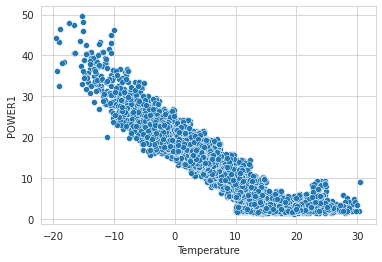

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.scatterplot(x = 'Temperature', y = 'POWER1', data = df2_Final)

In [ ]:
 #convert the dataframe into new excel file.
# create a excel writer object 
with pd.ExcelWriter("path to file\processed_data.xlsx") as writer: 
    
  df2_Final.to_excel(writer, sheet_name="0", index=False)  